In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import urllib.request
import time
from bs4 import BeautifulSoup
from geopy.geocoders import Nominatim
import geopandas as gpd
import seaborn as sns
from scipy import stats
import requests
import json

In [27]:
#url = 'https://www.zoocasa.com/services/api/v3/listings?filter%5Badditional%5D%5Bcondo-or-townhouse%5D%5Blocker%5D=any&filter%5Badditional%5D%5Bcondo-or-townhouse%5D%5Bmaintenance-fee%5D=&filter%5Badditional%5D%5Bhouse%5D%5Bbasement-apartment%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Bduplex%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Bfourplex%2B%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Bsingle-family%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Btriplex%5D=false&filter%5Barea-name%5D=&filter%5Bbathrooms%5D=1%2B&filter%5Bbedrooms%5D=0%2B&filter%5Bfireplace%5D=false&filter%5Bgarage%5D=false&filter%5Bhome-type%5D%5Bcondo%5D=true&filter%5Bhome-type%5D%5Bhouse-attached%5D=true&filter%5Bhome-type%5D%5Bhouse-detached%5D=true&filter%5Bhome-type%5D%5Bhouse-semidetached%5D=true&filter%5Bhome-type%5D%5Btownhouse%5D=true&filter%5Blatitude%5D=43.653226&filter%5Blisted-since%5D=&filter%5Blongitude%5D=-79.3831843&filter%5Bopen-house%5D=false&filter%5Bparking-spaces%5D=0%2B&filter%5Bpool%5D=false&filter%5Bprice-max%5D=&filter%5Bprice-min%5D=&filter%5Brental%5D=false&filter%5Bslug%5D=hamilton-on&filter%5Bsqft-max%5D=&filter%5Bsqft-min%5D=&filter%5Bstatus%5D=not-available-sold&filter%5Bwaterfront%5D=false&filter%5Bzoom%5D=14&page%5Bnumber%5D=1&page%5Bsize%5D=28&sort=-date'


In [28]:


#raw = requests.get(url).json()

In [29]:
#raw['data'][0]['attributes']['is-rental']

False

In [42]:
#raw['data'][6]['attributes']

{'is-rental': False,
 'status': 'not_available_sold',
 'price': '379900.0',
 'square-footage': {'max': 599, 'min': 500},
 'address-path': '/grimsby-on-real-estate/301-550-n-service-rd',
 'bedrooms': 1,
 'bathrooms': 1,
 'bedrooms-partial': None,
 'bathrooms-partial': None,
 'is-vow': False,
 'is-crea': False,
 'is-image-ready': True,
 'position': {'type': 'Point', 'coordinates': [-79.6077176, 43.210487]},
 'unit-number': '301',
 'street-number': '550',
 'street-name': 'North Service Rd',
 'city': 'Grimsby',
 'province': 'ON',
 'postal-code': 'L3H0H9',
 'open-houses': None,
 'style-name': 'condo-highrise',
 'image-url': 'https://cdn0.zoocasa.com/images/listings/61c0bf85-22b1-41c5-9870-b35a365aa0ce.jpg',
 'thumbnail-url': 'https://thumbnails.zoocasa.com/10476165-301-550-north-service-rd-grimsby-on-X5097506/photo-1.jpg',
 'path': '/grimsby-on-real-estate/10476165-301-550-north-service-rd-grimsby-on-l3h0h9',
 'added-at': '2021-01-29T12:37:19.748Z',
 'expired-at': None,
 'sold-price': '4070

In [33]:
#raw['data'][0]['attributes']['unit-number']+" "+raw['data'][0]['attributes']['street-number']+" "+raw['data'][0]['attributes']['street-name']

'38 Glenhaven Dr'

In [ ]:
oakville = 'https://www.zoocasa.com/services/api/v3/listings?filter%5Badditional%5D%5Bcondo-or-townhouse%5D%5Blocker%5D=any&filter%5Badditional%5D%5Bcondo-or-townhouse%5D%5Bmaintenance-fee%5D=&filter%5Badditional%5D%5Bhouse%5D%5Bbasement-apartment%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Bduplex%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Bfourplex%2B%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Bsingle-family%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Btriplex%5D=false&filter%5Barea-name%5D=&filter%5Bbathrooms%5D=1%2B&filter%5Bbedrooms%5D=0%2B&filter%5Bfireplace%5D=false&filter%5Bgarage%5D=false&filter%5Bhome-type%5D%5Bcondo%5D=true&filter%5Bhome-type%5D%5Bhouse-attached%5D=true&filter%5Bhome-type%5D%5Bhouse-detached%5D=true&filter%5Bhome-type%5D%5Bhouse-semidetached%5D=true&filter%5Bhome-type%5D%5Btownhouse%5D=true&filter%5Blatitude%5D=43.653226&filter%5Blisted-since%5D=&filter%5Blongitude%5D=-79.3831843&filter%5Bopen-house%5D=false&filter%5Bparking-spaces%5D=0%2B&filter%5Bpool%5D=false&filter%5Bprice-max%5D=&filter%5Bprice-min%5D=&filter%5Brental%5D=false&filter%5Bslug%5D=oakville-on&filter%5Bsqft-max%5D=&filter%5Bsqft-min%5D=&filter%5Bstatus%5D=not-available-sold&filter%5Bwaterfront%5D=false&filter%5Bzoom%5D=14&page%5Bnumber%5D='+str(num)+'&page%5Bsize%5D=28&sort=-date'
toronto = 'https://www.zoocasa.com/services/api/v3/listings?filter%5Badditional%5D%5Bcondo-or-townhouse%5D%5Blocker%5D=any&filter%5Badditional%5D%5Bcondo-or-townhouse%5D%5Bmaintenance-fee%5D=&filter%5Badditional%5D%5Bhouse%5D%5Bbasement-apartment%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Bduplex%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Bfourplex%2B%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Bsingle-family%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Btriplex%5D=false&filter%5Barea-name%5D=&filter%5Bbathrooms%5D=1%2B&filter%5Bbedrooms%5D=0%2B&filter%5Bfireplace%5D=false&filter%5Bgarage%5D=false&filter%5Bhome-type%5D%5Bcondo%5D=true&filter%5Bhome-type%5D%5Bhouse-attached%5D=true&filter%5Bhome-type%5D%5Bhouse-detached%5D=true&filter%5Bhome-type%5D%5Bhouse-semidetached%5D=true&filter%5Bhome-type%5D%5Btownhouse%5D=true&filter%5Blatitude%5D=43.653226&filter%5Blisted-since%5D=&filter%5Blongitude%5D=-79.3831843&filter%5Bopen-house%5D=false&filter%5Bparking-spaces%5D=0%2B&filter%5Bpool%5D=false&filter%5Bprice-max%5D=&filter%5Bprice-min%5D=&filter%5Brental%5D=false&filter%5Bslug%5D=toronto-on&filter%5Bsqft-max%5D=&filter%5Bsqft-min%5D=&filter%5Bstatus%5D=not-available-sold&filter%5Bwaterfront%5D=false&filter%5Bzoom%5D=14&page%5Bnumber%5D='+str(num)+'&page%5Bsize%5D=28&sort=-date'
mississauga = 'https://www.zoocasa.com/services/api/v3/listings?filter%5Badditional%5D%5Bcondo-or-townhouse%5D%5Blocker%5D=any&filter%5Badditional%5D%5Bcondo-or-townhouse%5D%5Bmaintenance-fee%5D=&filter%5Badditional%5D%5Bhouse%5D%5Bbasement-apartment%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Bduplex%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Bfourplex%2B%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Bsingle-family%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Btriplex%5D=false&filter%5Barea-name%5D=&filter%5Bbathrooms%5D=1%2B&filter%5Bbedrooms%5D=0%2B&filter%5Bfireplace%5D=false&filter%5Bgarage%5D=false&filter%5Bhome-type%5D%5Bcondo%5D=true&filter%5Bhome-type%5D%5Bhouse-attached%5D=true&filter%5Bhome-type%5D%5Bhouse-detached%5D=true&filter%5Bhome-type%5D%5Bhouse-semidetached%5D=true&filter%5Bhome-type%5D%5Btownhouse%5D=true&filter%5Blatitude%5D=43.653226&filter%5Blisted-since%5D=&filter%5Blongitude%5D=-79.3831843&filter%5Bopen-house%5D=false&filter%5Bparking-spaces%5D=0%2B&filter%5Bpool%5D=false&filter%5Bprice-max%5D=&filter%5Bprice-min%5D=&filter%5Brental%5D=false&filter%5Bslug%5D=mississauga-on&filter%5Bsqft-max%5D=&filter%5Bsqft-min%5D=&filter%5Bstatus%5D=not-available-sold&filter%5Bwaterfront%5D=false&filter%5Bzoom%5D=14&page%5Bnumber%5D='+str(num)+'&page%5Bsize%5D=28&sort=-date'
burlington = 'https://www.zoocasa.com/services/api/v3/listings?filter%5Badditional%5D%5Bcondo-or-townhouse%5D%5Blocker%5D=any&filter%5Badditional%5D%5Bcondo-or-townhouse%5D%5Bmaintenance-fee%5D=&filter%5Badditional%5D%5Bhouse%5D%5Bbasement-apartment%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Bduplex%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Bfourplex%2B%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Bsingle-family%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Btriplex%5D=false&filter%5Barea-name%5D=&filter%5Bbathrooms%5D=1%2B&filter%5Bbedrooms%5D=0%2B&filter%5Bfireplace%5D=false&filter%5Bgarage%5D=false&filter%5Bhome-type%5D%5Bcondo%5D=true&filter%5Bhome-type%5D%5Bhouse-attached%5D=true&filter%5Bhome-type%5D%5Bhouse-detached%5D=true&filter%5Bhome-type%5D%5Bhouse-semidetached%5D=true&filter%5Bhome-type%5D%5Btownhouse%5D=true&filter%5Blatitude%5D=43.653226&filter%5Blisted-since%5D=&filter%5Blongitude%5D=-79.3831843&filter%5Bopen-house%5D=false&filter%5Bparking-spaces%5D=0%2B&filter%5Bpool%5D=false&filter%5Bprice-max%5D=&filter%5Bprice-min%5D=&filter%5Brental%5D=false&filter%5Bslug%5D=burlington-on&filter%5Bsqft-max%5D=&filter%5Bsqft-min%5D=&filter%5Bstatus%5D=not-available-sold&filter%5Bwaterfront%5D=false&filter%5Bzoom%5D=14&page%5Bnumber%5D='+str(num)+'&page%5Bsize%5D=25&sort=-date'
grimsby = 'https://www.zoocasa.com/services/api/v3/listings?filter%5Badditional%5D%5Bcondo-or-townhouse%5D%5Blocker%5D=any&filter%5Badditional%5D%5Bcondo-or-townhouse%5D%5Bmaintenance-fee%5D=&filter%5Badditional%5D%5Bhouse%5D%5Bbasement-apartment%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Bduplex%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Bfourplex%2B%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Bsingle-family%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Btriplex%5D=false&filter%5Barea-name%5D=&filter%5Bbathrooms%5D=1%2B&filter%5Bbedrooms%5D=0%2B&filter%5Bfireplace%5D=false&filter%5Bgarage%5D=false&filter%5Bhome-type%5D%5Bcondo%5D=true&filter%5Bhome-type%5D%5Bhouse-attached%5D=true&filter%5Bhome-type%5D%5Bhouse-detached%5D=true&filter%5Bhome-type%5D%5Bhouse-semidetached%5D=true&filter%5Bhome-type%5D%5Btownhouse%5D=true&filter%5Blatitude%5D=43.653226&filter%5Blisted-since%5D=&filter%5Blongitude%5D=-79.3831843&filter%5Bopen-house%5D=false&filter%5Bparking-spaces%5D=0%2B&filter%5Bpool%5D=false&filter%5Bprice-max%5D=&filter%5Bprice-min%5D=&filter%5Brental%5D=false&filter%5Bslug%5D=grimsby-on&filter%5Bsqft-max%5D=&filter%5Bsqft-min%5D=&filter%5Bstatus%5D=not-available-sold&filter%5Bwaterfront%5D=false&filter%5Bzoom%5D=14&page%5Bnumber%5D='+str(num)+'&page%5Bsize%5D=25&sort=-date'
brampton = 'https://www.zoocasa.com/services/api/v3/listings?filter%5Badditional%5D%5Bcondo-or-townhouse%5D%5Blocker%5D=any&filter%5Badditional%5D%5Bcondo-or-townhouse%5D%5Bmaintenance-fee%5D=&filter%5Badditional%5D%5Bhouse%5D%5Bbasement-apartment%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Bduplex%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Bfourplex%2B%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Bsingle-family%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Btriplex%5D=false&filter%5Barea-name%5D=&filter%5Bbathrooms%5D=1%2B&filter%5Bbedrooms%5D=0%2B&filter%5Bfireplace%5D=false&filter%5Bgarage%5D=false&filter%5Bhome-type%5D%5Bcondo%5D=true&filter%5Bhome-type%5D%5Bhouse-attached%5D=true&filter%5Bhome-type%5D%5Bhouse-detached%5D=true&filter%5Bhome-type%5D%5Bhouse-semidetached%5D=true&filter%5Bhome-type%5D%5Btownhouse%5D=true&filter%5Blatitude%5D=43.653226&filter%5Blisted-since%5D=&filter%5Blongitude%5D=-79.3831843&filter%5Bopen-house%5D=false&filter%5Bparking-spaces%5D=0%2B&filter%5Bpool%5D=false&filter%5Bprice-max%5D=&filter%5Bprice-min%5D=&filter%5Brental%5D=false&filter%5Bslug%5D=brampton-on&filter%5Bsqft-max%5D=&filter%5Bsqft-min%5D=&filter%5Bstatus%5D=not-available-sold&filter%5Bwaterfront%5D=false&filter%5Bzoom%5D=14&page%5Bnumber%5D='+str(num)+'&page%5Bsize%5D=28&sort=-date'
markham = 'https://www.zoocasa.com/services/api/v3/listings?filter%5Badditional%5D%5Bcondo-or-townhouse%5D%5Blocker%5D=any&filter%5Badditional%5D%5Bcondo-or-townhouse%5D%5Bmaintenance-fee%5D=&filter%5Badditional%5D%5Bhouse%5D%5Bbasement-apartment%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Bduplex%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Bfourplex%2B%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Bsingle-family%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Btriplex%5D=false&filter%5Barea-name%5D=&filter%5Bbathrooms%5D=1%2B&filter%5Bbedrooms%5D=0%2B&filter%5Bfireplace%5D=false&filter%5Bgarage%5D=false&filter%5Bhome-type%5D%5Bcondo%5D=true&filter%5Bhome-type%5D%5Bhouse-attached%5D=true&filter%5Bhome-type%5D%5Bhouse-detached%5D=true&filter%5Bhome-type%5D%5Bhouse-semidetached%5D=true&filter%5Bhome-type%5D%5Btownhouse%5D=true&filter%5Blatitude%5D=43.653226&filter%5Blisted-since%5D=&filter%5Blongitude%5D=-79.3831843&filter%5Bopen-house%5D=false&filter%5Bparking-spaces%5D=0%2B&filter%5Bpool%5D=false&filter%5Bprice-max%5D=&filter%5Bprice-min%5D=&filter%5Brental%5D=false&filter%5Bslug%5D=markham-on&filter%5Bsqft-max%5D=&filter%5Bsqft-min%5D=&filter%5Bstatus%5D=not-available-sold&filter%5Bwaterfront%5D=false&filter%5Bzoom%5D=14&page%5Bnumber%5D='+str(num)+'&page%5Bsize%5D=28&sort=-date'
scarborough = 'https://www.zoocasa.com/services/api/v3/listings?filter%5Badditional%5D%5Bcondo-or-townhouse%5D%5Blocker%5D=any&filter%5Badditional%5D%5Bcondo-or-townhouse%5D%5Bmaintenance-fee%5D=&filter%5Badditional%5D%5Bhouse%5D%5Bbasement-apartment%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Bduplex%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Bfourplex%2B%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Bsingle-family%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Btriplex%5D=false&filter%5Barea-name%5D=&filter%5Bbathrooms%5D=1%2B&filter%5Bbedrooms%5D=0%2B&filter%5Bfireplace%5D=false&filter%5Bgarage%5D=false&filter%5Bhome-type%5D%5Bcondo%5D=true&filter%5Bhome-type%5D%5Bhouse-attached%5D=true&filter%5Bhome-type%5D%5Bhouse-detached%5D=true&filter%5Bhome-type%5D%5Bhouse-semidetached%5D=true&filter%5Bhome-type%5D%5Btownhouse%5D=true&filter%5Blatitude%5D=43.653226&filter%5Blisted-since%5D=&filter%5Blongitude%5D=-79.3831843&filter%5Bopen-house%5D=false&filter%5Bparking-spaces%5D=0%2B&filter%5Bpool%5D=false&filter%5Bprice-max%5D=&filter%5Bprice-min%5D=&filter%5Brental%5D=false&filter%5Bslug%5D=scarborough-on&filter%5Bsqft-max%5D=&filter%5Bsqft-min%5D=&filter%5Bstatus%5D=not-available-sold&filter%5Bwaterfront%5D=false&filter%5Bzoom%5D=14&page%5Bnumber%5D='+str(num)+'&page%5Bsize%5D=28&sort=-date'
hamilton = 'https://www.zoocasa.com/services/api/v3/listings?filter%5Badditional%5D%5Bcondo-or-townhouse%5D%5Blocker%5D=any&filter%5Badditional%5D%5Bcondo-or-townhouse%5D%5Bmaintenance-fee%5D=&filter%5Badditional%5D%5Bhouse%5D%5Bbasement-apartment%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Bduplex%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Bfourplex%2B%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Bsingle-family%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Btriplex%5D=false&filter%5Barea-name%5D=&filter%5Bbathrooms%5D=1%2B&filter%5Bbedrooms%5D=0%2B&filter%5Bfireplace%5D=false&filter%5Bgarage%5D=false&filter%5Bhome-type%5D%5Bcondo%5D=true&filter%5Bhome-type%5D%5Bhouse-attached%5D=true&filter%5Bhome-type%5D%5Bhouse-detached%5D=true&filter%5Bhome-type%5D%5Bhouse-semidetached%5D=true&filter%5Bhome-type%5D%5Btownhouse%5D=true&filter%5Blatitude%5D=43.653226&filter%5Blisted-since%5D=&filter%5Blongitude%5D=-79.3831843&filter%5Bopen-house%5D=false&filter%5Bparking-spaces%5D=0%2B&filter%5Bpool%5D=false&filter%5Bprice-max%5D=&filter%5Bprice-min%5D=&filter%5Brental%5D=false&filter%5Bslug%5D=hamilton-on&filter%5Bsqft-max%5D=&filter%5Bsqft-min%5D=&filter%5Bstatus%5D=not-available-sold&filter%5Bwaterfront%5D=false&filter%5Bzoom%5D=14&page%5Bnumber%5D='+str(num)+'&page%5Bsize%5D=28&sort=-date'

#next time, you can use excel to generate all the links and then combine all city links in one df to fetch the data

In [66]:
data = pd.DataFrame(columns=['Page_no','Link_no','Address','City','Sold_price','List_price','Style',
                                'Bedrooms','Bathrooms','Sqft_min','Sqft_max','Latitude',
                                'Longitude','Postal_code','Added_at','Sold_at','Last_status','Is_crea',
                                'Is_rental','Link_path','Address_path'])


total_pages = 50
i = 0
skipped = []

for num in range(1, total_pages+1):
    try:
        url = 'https://www.zoocasa.com/services/api/v3/listings?filter%5Badditional%5D%5Bcondo-or-townhouse%5D%5Blocker%5D=any&filter%5Badditional%5D%5Bcondo-or-townhouse%5D%5Bmaintenance-fee%5D=&filter%5Badditional%5D%5Bhouse%5D%5Bbasement-apartment%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Bduplex%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Bfourplex%2B%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Bsingle-family%5D=false&filter%5Badditional%5D%5Bhouse%5D%5Btriplex%5D=false&filter%5Barea-name%5D=&filter%5Bbathrooms%5D=1%2B&filter%5Bbedrooms%5D=0%2B&filter%5Bfireplace%5D=false&filter%5Bgarage%5D=false&filter%5Bhome-type%5D%5Bcondo%5D=true&filter%5Bhome-type%5D%5Bhouse-attached%5D=true&filter%5Bhome-type%5D%5Bhouse-detached%5D=true&filter%5Bhome-type%5D%5Bhouse-semidetached%5D=true&filter%5Bhome-type%5D%5Btownhouse%5D=true&filter%5Blatitude%5D=43.653226&filter%5Blisted-since%5D=&filter%5Blongitude%5D=-79.3831843&filter%5Bopen-house%5D=false&filter%5Bparking-spaces%5D=0%2B&filter%5Bpool%5D=false&filter%5Bprice-max%5D=&filter%5Bprice-min%5D=&filter%5Brental%5D=false&filter%5Bslug%5D=hamilton-on&filter%5Bsqft-max%5D=&filter%5Bsqft-min%5D=&filter%5Bstatus%5D=not-available-sold&filter%5Bwaterfront%5D=false&filter%5Bzoom%5D=14&page%5Bnumber%5D='+str(num)+'&page%5Bsize%5D=28&sort=-date'
        raw = requests.get(url).json()
        
        for listing in raw['data']:
            
            try:
            
                data.loc[i,'Page_no'] = num
                data.loc[i,'Link_no'] = i+1
                att = listing['attributes']
                if not att['unit-number'] == None:
                    data.loc[i,'Address'] = att['unit-number']+" - "+att['street-number']+" "+att['street-name']
                else:    
                    data.loc[i,'Address'] = att['street-number']+" "+att['street-name']
                data.loc[i,'City'] = att['city']
                data.loc[i,'Sold_price'] = att['sold-price']
                data.loc[i,'List_price'] = att['price']
                data.loc[i,'Style'] = att['style-name']
                data.loc[i,'Bedrooms'] = att['bedrooms']
                data.loc[i,'Bathrooms'] = att['bathrooms']
                if not att['position'] == None:
                    data.loc[i,'Latitude'] = att['position']['coordinates'][0]
                    data.loc[i,'Longitude'] = att['position']['coordinates'][1]
                else:
                    data.loc[i,'Latitude'] = np.nan
                    data.loc[i,'Longitude'] = np.nan
                data.loc[i,'Postal_code'] = att['postal-code']
                data.loc[i,'Added_at'] = att['added-at']
                data.loc[i,'Sold_at'] = att['sold-at']
                data.loc[i,'Is_rental'] = att['is-rental']
                data.loc[i,'Is_crea'] = att['is-crea']
                data.loc[i,'Last_status'] = att['last-status']
                data.loc[i,'Link_path'] = att['path']
                data.loc[i,'Address_path'] = att['address-path']
                data.loc[i,'Sqft_max'] = att['square-footage']['max']
                data.loc[i,'Sqft_min'] = att['square-footage']['min']
                
            except:
                pass
                print('Problem with Page',num,'Address:', att['street-number']+" "+att['street-name'])
            
            i += 1
            
        time.sleep(1)
        
    except:
        print('Problem with page',num)
        skipped.append(i)
        continue

data.to_excel('data_HT_v2.xlsx')
data.shape

Problem with Page 1 Address: 465 Golf Links Rd
Problem with Page 1 Address: 108 Second St N
Problem with Page 2 Address: 1183 King St W
Problem with Page 2 Address: 47 Karsh Cres
Problem with Page 2 Address: 11 Painter Terr
Problem with Page 2 Address: 140 Huntingwood Ave
Problem with Page 2 Address: 22 Kingsborough Dr
Problem with Page 2 Address: 321 Cumberland Ave
Problem with Page 3 Address: 616 Acadia Dr
Problem with Page 3 Address: 129 Skinner Rd
Problem with Page 4 Address: 100 Fairholt Rd S
Problem with Page 4 Address: 119 Fairfield Ave
Problem with Page 4 Address: 27 Milano Crt
Problem with Page 4 Address: 1957 Rymal Rd E
Problem with Page 4 Address: 969 Upper Gage Ave
Problem with Page 5 Address: 77 Cameron Ave N
Problem with Page 5 Address: 89 David Ave
Problem with Page 5 Address: 255 Province St S
Problem with Page 5 Address: 83 Nash Rd
Problem with Page 5 Address: 36 Ward Ave
Problem with Page 5 Address: 400 Sherman Ave N
Problem with Page 6 Address: 18 Park Row N
Problem 

Problem with Page 40 Address: 123 Niagara St
Problem with Page 40 Address: 15 Murray St W
Problem with Page 41 Address: 69 Royal Ave
Problem with Page 41 Address: 460 Upper Gage Ave
Problem with Page 41 Address: 26 Radford St
Problem with Page 41 Address: 169 London St N
Problem with Page 41 Address: lot 38r Great Falls Blvd
Problem with Page 42 Address: 45 Tragina Ave N
Problem with Page 42 Address: 31 Brodick St
Problem with Page 42 Address: 6 Borers Creek Circ S
Problem with Page 42 Address: 378 Berkindale Dr
Problem with Page 42 Address: 158 Birch Ave
Problem with Page 42 Address: 25 Chester Rd
Problem with Page 43 Address: 22 Bywood Cres
Problem with Page 44 Address: 233 Alderlea Ave
Problem with Page 44 Address: 154 Solomon Cres
Problem with Page 44 Address: 8 Fairway Dr
Problem with Page 45 Address: 22 Harvey St
Problem with Page 45 Address: 99 Leeming St
Problem with Page 45 Address: 92 Graham Ave S
Problem with Page 45 Address: 8 Southmeadow Crt
Problem with Page 45 Address: 8

(1253, 21)

In [3]:
data_TR = pd.read_excel('/Users/roxanneli/Desktop/City of Hamilton/project/data_TR_v1.xlsx', index_col=0)
data_MS = pd.read_excel('/Users/roxanneli/Desktop/City of Hamilton/project/data_MS_v1.xlsx', index_col=0)
data_OV = pd.read_excel('/Users/roxanneli/Desktop/City of Hamilton/project/data_OV_v1.xlsx', index_col=0)
data_GB = pd.read_excel('/Users/roxanneli/Desktop/City of Hamilton/project/data_GB_v2.xlsx', index_col=0)
data_MH = pd.read_excel('/Users/roxanneli/Desktop/City of Hamilton/project/data_MH_v1.xlsx', index_col=0)
data_SB = pd.read_excel('/Users/roxanneli/Desktop/City of Hamilton/project/data_SB_v1.xlsx', index_col=0)
data_BRT = pd.read_excel('/Users/roxanneli/Desktop/City of Hamilton/project/data_BRT_v1.xlsx', index_col=0)
data_HT = pd.read_excel('/Users/roxanneli/Desktop/City of Hamilton/project/data_HT_v2.xlsx', index_col=0)
data_BT = pd.read_excel('/Users/roxanneli/Desktop/City of Hamilton/project/data_BT_v2.xlsx', index_col=0)

## Analysis on Hamilton-Burlington region

In [4]:
data_HT.isnull().sum()

Page_no           0
Link_no           0
Address           0
City              0
Sold_price        0
List_price        0
Style             0
Bedrooms          0
Bathrooms         0
Sqft_min        229
Sqft_max        218
Latitude          3
Longitude         3
Postal_code       0
Added_at          0
Sold_at           0
Last_status       0
Is_crea           0
Is_rental         0
Link_path         0
Address_path      0
dtype: int64

In [5]:
com_bound = gpd.read_file('/Users/roxanneli/Desktop/City of Hamilton/project/Community_Boundaries/Community_Boundaries.shp')
com_bound['geometry'] = com_bound['geometry'].to_crs({'init':'EPSG:4269'})
com_bound

,OBJECTID,COMMUNITY_,geometry
0,1,Ancaster,"POLYGON ((-80.02699 43.24938, -80.02681 43.248..."
1,2,Dundas,"POLYGON ((-79.91171 43.30788, -79.91153 43.307..."
2,3,Flamborough,"POLYGON ((-79.88436 43.32917, -79.88442 43.329..."
3,4,Glanbrook,"POLYGON ((-79.92765 43.20982, -79.92761 43.209..."
4,5,Hamilton,"POLYGON ((-79.79851 43.29853, -79.79789 43.297..."
5,6,Stoney Creek,"POLYGON ((-79.67402 43.23066, -79.67393 43.230..."


In [6]:
subdivision = gpd.read_file('/Users/roxanneli/Desktop/City of Hamilton/project/CensusSubdivision2016/DMTI_2019_CMCS_CensusSubdivisionRegion2016.shp')
#subdivision['geometry'] = subdivision['geometry'].to_crs({'init':'EPSG:4269'})
#subdivision['geometry'] = gpd.GeoDataFrame(geometry=gpd.GeoSeries(subdivision['geometry']))
GB_geo = subdivision.loc[1033, 'geometry']
BT_geo = subdivision.loc[1050, 'geometry']

In [7]:
H_B_bound = com_bound.append({'OBJECTID': 7,'COMMUNITY_':'Grimsby','geometry':GB_geo},ignore_index=True)
H_B_bound = H_B_bound.append({'OBJECTID': 8,'COMMUNITY_':'Burlington','geometry':BT_geo}, ignore_index=True)
H_B_bound

,OBJECTID,COMMUNITY_,geometry
0,1,Ancaster,"POLYGON ((-80.02699 43.24938, -80.02681 43.248..."
1,2,Dundas,"POLYGON ((-79.91171 43.30788, -79.91153 43.307..."
2,3,Flamborough,"POLYGON ((-79.88436 43.32917, -79.88442 43.329..."
3,4,Glanbrook,"POLYGON ((-79.92765 43.20982, -79.92761 43.209..."
4,5,Hamilton,"POLYGON ((-79.79851 43.29853, -79.79789 43.297..."
5,6,Stoney Creek,"POLYGON ((-79.67402 43.23066, -79.67393 43.230..."
6,7,Grimsby,"POLYGON ((-79.59456 43.21918, -79.57933 43.210..."
7,8,Burlington,"POLYGON ((-79.86775 43.45768, -79.86735 43.457..."


In [8]:
import json
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar

bound_json = json.loads(H_B_bound.to_json())

json_data = json.dumps(bound_json)

geosource = GeoJSONDataSource(geojson = json_data)

p = figure(title = 'Hamilton Communities', plot_height = 600, plot_width = 950)
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

p.patches('xs','ys', source = geosource, line_color='white',line_width=0.25,
          fill_alpha=1)

output_notebook()
show(p)

Loading BokehJS ...

In [9]:
print(data_BT.shape)
print(data_HT.shape)
print(data_GB.shape)

(1175, 21)
(1253, 21)
(75, 21)


In [10]:
H_B = pd.concat([data_HT, data_BT, data_GB], axis = 0)
H_B.reset_index(drop=True, inplace=True)
print(H_B.shape)
H_B.head()

(2503, 21)


,Page_no,Link_no,Address,City,Sold_price,List_price,Style,Bedrooms,Bathrooms,Sqft_min,...,Latitude,Longitude,Postal_code,Added_at,Sold_at,Last_status,Is_crea,Is_rental,Link_path,Address_path
0,1,1,38 Glenhaven Dr,Hamilton,900000.0,799900.0,house-detached,4,3,2000.0,...,-79.915182,43.223989,L9C7G6,2021-03-04T17:51:30.996Z,2021-03-04T04:00:00.000Z,Sld,False,False,/hamilton-on-real-estate/10563890-38-glenhaven...,/hamilton-on-real-estate/38-glenhaven-dr
1,1,2,465 Golf Links Rd,Hamilton,2320000.0,2295000.0,house-detached,4,5,NaN,...,-79.966509,43.223553,L9G4X6,2021-03-01T21:50:20.274Z,2021-03-04T04:00:00.000Z,Sld,False,False,/hamilton-on-real-estate/10544832-465-golf-lin...,/hamilton-on-real-estate/465-golf-links-rd
2,1,3,35 Bellstone Lane,Hamilton,1000777.0,799900.0,house-detached,2,3,1500.0,...,-79.929654,43.201011,L011W0,2021-02-25T18:50:32.986Z,2021-03-04T04:00:00.000Z,Sld,False,False,/hamilton-on-real-estate/10539395-35-bellstone...,/hamilton-on-real-estate/35-bellstone-ln
3,1,4,18 Greenwich Ave,Hamilton,807500.0,809777.0,house-attached,3,3,1100.0,...,-79.815563,43.185756,L8J0L5,2021-03-02T17:36:26.476Z,2021-03-03T04:00:00.000Z,Sld,False,False,/hamilton-on-real-estate/10546068-18-greenwich...,/hamilton-on-real-estate/18-greenwich-ave
4,1,5,237 Highridge Ave,Hamilton,820000.0,699999.0,house-detached,4,2,1100.0,...,-79.745003,43.226008,L8E3P9,2021-03-02T15:35:57.816Z,2021-03-03T04:00:00.000Z,Sld,False,False,/hamilton-on-real-estate/10545555-237-highridg...,/hamilton-on-real-estate/237-highridge-ave


In [11]:
H_B.loc[H_B.Latitude.isnull()]

,Page_no,Link_no,Address,City,Sold_price,List_price,Style,Bedrooms,Bathrooms,Sqft_min,...,Latitude,Longitude,Postal_code,Added_at,Sold_at,Last_status,Is_crea,Is_rental,Link_path,Address_path
1036,42,1037,71 Buttercup Cres,Hamilton,770000.0,799900.0,house-detached,3,4,1100.0,...,NaN,NaN,L8B0X9,2020-11-19T18:36:36.055Z,2020-12-09T04:00:00.000Z,Sld,False,False,/hamilton-on-real-estate/10226503-71-buttercup...,/hamilton-on-real-estate/71-buttercup-cres
1082,44,1083,33 Highland Ave,Hamilton,330000.0,249900.0,house-detached,2,2,700.0,...,NaN,NaN,L8L1Y8,2020-12-02T15:36:40.568Z,2020-12-04T04:00:00.000Z,Sld,False,False,/hamilton-on-real-estate/10346187-33-highland-...,/hamilton-on-real-estate/33-highland-ave
1106,45,1107,319 Macintosh Dr,Hamilton,626000.0,599900.0,house-detached,3,3,1100.0,...,NaN,NaN,L8E4E1,2020-11-28T12:35:11.624Z,2020-12-02T04:00:00.000Z,Sld,False,False,/hamilton-on-real-estate/10248627-319-macintos...,/hamilton-on-real-estate/319-macintosh-dr
1939,28,687,4702 Irena Ave,Burlington,1190000.0,1250000.0,house-detached,4,4,2500.0,...,NaN,NaN,L7M0K2,2020-11-20T12:35:28.828Z,2020-11-23T04:00:00.000Z,Sld,False,False,/burlington-on-real-estate/10227516-4702-irena...,/burlington-on-real-estate/4702-irena-ave


In [12]:
for row, value in H_B[H_B['Latitude'].isnull()].iterrows():
    
    try:
        url = "https://api.mapbox.com/geocoding/v5/mapbox.places/"+str(H_B.loc[row, 'Address'])+".json?access_token=pk.eyJ1Ijoicm94YW5uZWxpIiwiYSI6ImNrbHYzZmJtdzB0cG4ycG1zb2thOTN6bHgifQ.97j0RoRwUFq51joGoqxzLw"
        resp = requests.get(url).json()
        for add in resp['features']:
            if (add['context'][1]['text'] in ['Hamilton','Burlington']) and (add['context'][3]['text'] == 'Canada'):
                H_B.loc[row, 'Latitude'] = add['geometry']['coordinates'][0]
                H_B.loc[row, 'Longitude'] = add['geometry']['coordinates'][1]
                break
                
    except:
        print(row)

1036
1082
1106
1939


In [13]:
H_B.loc[H_B.Latitude.isnull()]

,Page_no,Link_no,Address,City,Sold_price,List_price,Style,Bedrooms,Bathrooms,Sqft_min,...,Latitude,Longitude,Postal_code,Added_at,Sold_at,Last_status,Is_crea,Is_rental,Link_path,Address_path
1036,42,1037,71 Buttercup Cres,Hamilton,770000.0,799900.0,house-detached,3,4,1100.0,...,NaN,NaN,L8B0X9,2020-11-19T18:36:36.055Z,2020-12-09T04:00:00.000Z,Sld,False,False,/hamilton-on-real-estate/10226503-71-buttercup...,/hamilton-on-real-estate/71-buttercup-cres
1082,44,1083,33 Highland Ave,Hamilton,330000.0,249900.0,house-detached,2,2,700.0,...,NaN,NaN,L8L1Y8,2020-12-02T15:36:40.568Z,2020-12-04T04:00:00.000Z,Sld,False,False,/hamilton-on-real-estate/10346187-33-highland-...,/hamilton-on-real-estate/33-highland-ave
1106,45,1107,319 Macintosh Dr,Hamilton,626000.0,599900.0,house-detached,3,3,1100.0,...,NaN,NaN,L8E4E1,2020-11-28T12:35:11.624Z,2020-12-02T04:00:00.000Z,Sld,False,False,/hamilton-on-real-estate/10248627-319-macintos...,/hamilton-on-real-estate/319-macintosh-dr
1939,28,687,4702 Irena Ave,Burlington,1190000.0,1250000.0,house-detached,4,4,2500.0,...,NaN,NaN,L7M0K2,2020-11-20T12:35:28.828Z,2020-11-23T04:00:00.000Z,Sld,False,False,/burlington-on-real-estate/10227516-4702-irena...,/burlington-on-real-estate/4702-irena-ave


In [14]:
#manually input coordinates for this address
H_B.loc[H_B.Latitude.isnull(), 'Latitude'] = -79.8265
H_B.loc[H_B.Longitude.isnull(), 'Longitude'] = 43.2488

In [19]:
H_B.isnull().sum()

Page_no           0
Link_no           0
Address           0
City              0
Sold_price        0
List_price        0
Style             0
Bedrooms          0
Bathrooms         0
Sqft_min        377
Sqft_max        364
Latitude          0
Longitude         0
Postal_code       0
Added_at          0
Sold_at           0
Last_status       0
Is_crea           0
Is_rental         0
Link_path         0
Address_path      0
Community         0
dtype: int64

In [22]:
H_B_bound

,OBJECTID,COMMUNITY_,geometry
0,1,Ancaster,"POLYGON ((-80.02699 43.24938, -80.02681 43.248..."
1,2,Dundas,"POLYGON ((-79.91171 43.30788, -79.91153 43.307..."
2,3,Flamborough,"POLYGON ((-79.88436 43.32917, -79.88442 43.329..."
3,4,Glanbrook,"POLYGON ((-79.92765 43.20982, -79.92761 43.209..."
4,5,Hamilton,"POLYGON ((-79.79851 43.29853, -79.79789 43.297..."
5,6,Stoney Creek,"POLYGON ((-79.67402 43.23066, -79.67393 43.230..."
6,7,Grimsby,"POLYGON ((-79.59456 43.21918, -79.57933 43.210..."
7,8,Burlington,"POLYGON ((-79.86775 43.45768, -79.86735 43.457..."


In [26]:
from shapely.geometry import Point, Polygon

def find_community(point, df):
    
    in_shape = []
    for sh in df.geometry:
        within = point.within(sh)
        in_shape.append(within)
    return df.loc[in_shape.index(True), 'COMMUNITY_']

H_B['Community'] = 0

not_assigned = []

for row, value in H_B.iterrows():
    try:
        result = find_community(Point(H_B.loc[row,'Latitude'], H_B.loc[row,'Longitude']), H_B_bound)
        H_B.loc[row,'Community'] = result
    except:
        not_assigned.append(row)
        
print(not_assigned)

[1842, 1991, 2099]


In [27]:
H_B = H_B[H_B.Community != 0]
H_B.shape

(2500, 22)

In [102]:
H_B['Sold_price'] = H_B['Sold_price'].astype('float')
H_B['List_price'] = H_B['List_price'].astype('float')
H_B_price = pd.pivot_table(H_B, index=['Community'], values=['List_price','Sold_price'], aggfunc=np.mean)
H_B_price.to_excel("Hamilton-Burlington Avg Sold Price.xlsx")

In [103]:
H_B_price2 = pd.pivot_table(H_B, index=['Community'], columns=['Style'],values=['Sold_price'], aggfunc=np.mean)
H_B_price2.to_excel("Hamilton-Burlington Avg Sold Price by Style.xlsx")
H_B_price2

Sold_price                                           \
Style        condo-highrise condo-lowrise condo-other house-attached   
Community                                                              
Ancaster      433000.000000           NaN         NaN  688857.142857   
Burlington    548084.238095     687156.25    440000.0  843036.830189   
Dundas                  NaN     627400.00         NaN            NaN   
Flamborough             NaN     695000.00         NaN  846102.551724   
Glanbrook               NaN     703950.00         NaN  737040.000000   
Grimsby       477025.000000    1411000.00         NaN  773863.636364   
Hamilton      401645.150943     518878.00         NaN  601424.750000   
Stoney Creek  440590.593750     531500.00         NaN  703365.137931   

                                                               
Style        house-detached house-semidetached      townhouse  
Community                                                      
Ancaster       1.303318e+06      850738.333333  761500.000000  
Burlington     1.329788e+06      832401.040816  676493.110577  
Dundas         9.811964e+05                NaN  574250.000000  
Flamborough    1.041512e+06      835440.818182  684580.818182  
Glanbrook      1.001580e+06      951000.000000  575000.000000  
Grimsby        9.666666e+05                NaN  518916.666667  
Hamilton       6.845031e+05      524025.850000  527357.200000  
Stoney Creek   9.815826e+05      778955.555556  654050.000000

In [28]:
H_B_sf = H_B[~H_B.Sqft_min.isnull()]
H_B_sf.shape

(2125, 22)

In [29]:
H_B_sf.isnull().sum()

Page_no         0
Link_no         0
Address         0
City            0
Sold_price      0
List_price      0
Style           0
Bedrooms        0
Bathrooms       0
Sqft_min        0
Sqft_max        0
Latitude        0
Longitude       0
Postal_code     0
Added_at        0
Sold_at         0
Last_status     0
Is_crea         0
Is_rental       0
Link_path       0
Address_path    0
Community       0
dtype: int64

In [35]:
H_B_sf['Sqft_max'] = H_B_sf['Sqft_max'].astype('float')
H_B_sf['Sqft_min'] = H_B_sf['Sqft_min'].astype('float')
H_B_sf['Avg_sqft'] = (H_B_sf['Sqft_max']+H_B_sf['Sqft_min'])/2
H_B_sf['Sold_price'] = H_B_sf['Sold_price'].astype('float')
H_B_sf['List_price'] = H_B_sf['List_price'].astype('float')
H_B_sf['Sold_per_sqft'] = H_B_sf['Sold_price'] / H_B_sf['Avg_sqft']
H_B_sf['List_per_sqft'] = H_B_sf['List_price'] / H_B_sf['Avg_sqft']
H_B_sf['Diff_on_each'] = round((H_B_sf['Sold_per_sqft'] - H_B_sf['List_per_sqft'])/H_B_sf['List_per_sqft'],2)

In [104]:
H_B_psf = pd.pivot_table(H_B_sf, index=['Community'],values=['Sold_per_sqft','List_per_sqft','Diff_on_each'], aggfunc=np.median)
H_B_psf['Diff'] = round((H_B_psf['Sold_per_sqft'] - H_B_psf['List_per_sqft']) / H_B_psf['List_per_sqft'], 2)
H_B_psf.to_excel("Hamilton_Burlington Sold price per sf.xlsx")
H_B_psf

,Diff_on_each,List_per_sqft,Sold_per_sqft,Diff
Community,,,,
Ancaster,0.01,444.892752,466.190476,0.05
Burlington,0.01,553.425690,576.317545,0.04
Dundas,0.08,466.155385,488.649481,0.05
Flamborough,0.07,457.085714,494.258242,0.08
Glanbrook,0.08,399.971143,427.933333,0.07
Grimsby,0.11,461.461538,533.333333,0.16
Hamilton,0.08,433.516776,472.095726,0.09
Stoney Creek,0.05,433.714286,484.615385,0.12


In [37]:
list(H_B_sf.Community.unique())

['Hamilton',
 'Glanbrook',
 'Stoney Creek',
 'Ancaster',
 'Flamborough',
 'Dundas',
 'Burlington',
 'Grimsby']

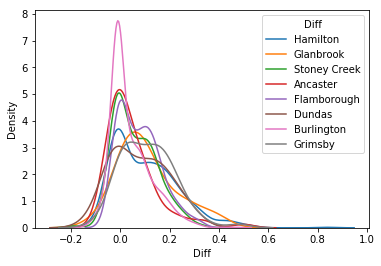

In [38]:
H_B_sf['Diff'] = round((H_B_sf['Sold_price'] - H_B_sf['List_price']) / H_B_sf['List_price'], 2)

#grid = sns.FacetGrid(H_B_sf, row='Community', size=2.2, aspect=1.6)
#grid.map(sns.displot,'Diff')
#grid.add_legend()

def density_plot(df, col, label):
    list_ = list(df[label].unique())
    
    for item in list_:
        subset = df[df[label] == item][col]
        sns.distplot(subset,label = item, hist=False)

    plt.legend(title = col)

density_plot(H_B_sf, 'Diff', 'Community')

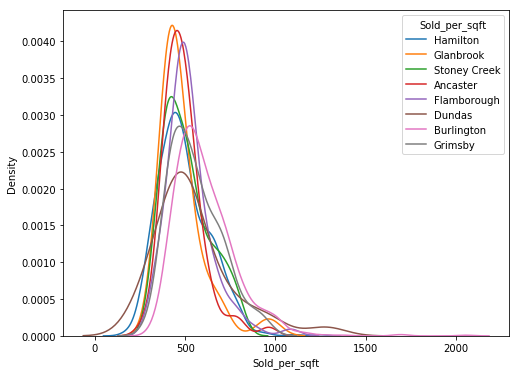

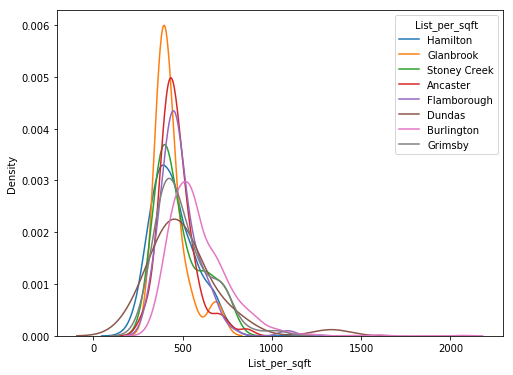

In [39]:
plt.figure(1, figsize = (8,6))
density_plot(H_B_sf, 'Sold_per_sqft','Community')

plt.figure(2, figsize = (8,6))
density_plot(H_B_sf, 'List_per_sqft', 'Community')

In [100]:
H_B_psf2 = pd.pivot_table(H_B_sf, columns=['Style'], index=['Community'], values=['Sold_per_sqft'], aggfunc=np.median)
H_B_psf2

Sold_per_sqft                                           \
Style        condo-highrise condo-lowrise condo-other house-attached   
Community                                                              
Ancaster         577.718479           NaN         NaN     444.615385   
Burlington       583.901774    519.839947  587.058039     550.000000   
Dundas                  NaN    475.811349         NaN            NaN   
Flamborough             NaN    366.862708         NaN     481.071429   
Glanbrook               NaN    418.039346         NaN     423.171429   
Grimsby          681.325860    742.827060         NaN     532.307692   
Hamilton         453.207769    435.927376         NaN     419.428571   
Stoney Creek     678.317439    413.710469         NaN     446.153846   

                                                            
Style        house-detached house-semidetached   townhouse  
Community                                                   
Ancaster         488.444444         462.857143  443.481160  
Burlington       650.077922         553.770000  493.091574  
Dundas           515.555556                NaN  418.216037  
Flamborough      521.111111         528.571429  447.831127  
Glanbrook        428.047619         543.428571  442.477876  
Grimsby          533.333333                NaN  437.176312  
Hamilton         484.269231         500.000000  415.139205  
Stoney Creek     457.333333         506.571429  450.578254

In [101]:
H_B_psf2.to_excel("Hamilton-Burlington price per sf by Style.xlsx")

## Analysis on GTA

In [41]:
All_city = pd.concat([data_HT,data_BT,data_TR,data_MS,data_OV,data_MH,data_SB,data_BRT,data_GB], axis=0, ignore_index=True)
print(All_city.shape)
GTA = All_city[~All_city['Latitude'].isnull()].reset_index()
print(GTA.shape)

(10003, 21)
(9993, 22)


In [42]:
GTA_com = gpd.read_file('/Users/roxanneli/Desktop/City of Hamilton/project/municlow/municlow.shp')
#subdivision['geometry'] = subdivision['geometry'].to_crs({'init':'EPSG:4269'})
#subdivision['geometry'] = gpd.GeoDataFrame(geometry=gpd.GeoSeries(subdivision['geometry']))
GTA_com.head()

,OBJECT_ID,DESCR,GUT_NUMBER,LABEL,NAME,MUNID,MAH_CODE,EXTENT_T,ASSESS_C,NAME_PREF,...,SENS_CLASS,SENS_DATE,SENS_RAT,SENS_DESCR,SYS_AREA,SYS_LENGTH,USER_CALC,GNL_CMT,EFF_DATE,geometry
0,67916708,Lower Tier Municipality,95,TOWNSHIP OF ORO-MEDONTE,TOWNSHIP OF ORO-MEDONTE,43047,70621,Water,4346,None,...,Non-Sensitive,2008-03-17,No Restriction Needed,None,4.493266e+08,344854.462,0.0,None,2010-01-07,"POLYGON ((-79.29726 44.77446, -79.29729 44.774..."
1,67916705,Lower Tier Municipality,95,TOWNSHIP OF ORO-MEDONTE,TOWNSHIP OF ORO-MEDONTE,43047,70621,Mainland,4346,None,...,Non-Sensitive,2008-03-17,No Restriction Needed,None,5.913289e+08,123884.984,0.0,None,2010-01-07,"MULTIPOLYGON (((-79.64435 44.66823, -79.64291 ..."
2,67916703,Lower Tier Municipality,95,TOWNSHIP OF SPRINGWATER,TOWNSHIP OF SPRINGWATER,43040,70624,Mainland,4341,None,...,Non-Sensitive,2008-03-17,No Restriction Needed,None,5.435422e+08,108225.977,0.0,None,2010-01-07,"POLYGON ((-79.78821 44.63910, -79.78550 44.635..."
3,67916321,Lower Tier Municipality,95,CITY OF MISSISSAUGA,CITY OF MISSISSAUGA,21005,21102,Water,2105,None,...,Non-Sensitive,2008-03-17,No Restriction Needed,None,1.747890e+08,68188.358,0.0,None,2010-01-07,"POLYGON ((-79.54157 43.58421, -79.41785 43.376..."
4,67906452,Single Tier Municipality,96,CITY OF TORONTO,CITY OF TORONTO,20002,1106,Mainland,1999,None,...,Non-Sensitive,2008-03-13,No Restriction Needed,None,6.317938e+08,191756.012,0.0,None,2010-01-07,"POLYGON ((-79.15166 43.81436, -79.15156 43.814..."


In [43]:
city = ['TORONTO','MISSISSAUGA','BRAMPTON','OAKVILLE','MARKHAM','HAMILTON','BURLINGTON','GRIMSBY']
index = []
for name in city:
    list_of_index = list(GTA_com[GTA_com.NAME.str.contains(name)].index)
    index.append(list_of_index)

index1 = [j for item in index for j in item]
GTA_com_mod = GTA_com.iloc[index1,:]

TR_geo = GTA_com_mod.loc[4, 'geometry']
MS_geo = GTA_com_mod.loc[5, 'geometry']
BRT_geo = GTA_com_mod.loc[16, 'geometry']
OV_geo = GTA_com_mod.loc[18, 'geometry']
MH_geo = GTA_com_mod.loc[664, 'geometry']
HT_geo = GTA_com_mod.loc[119, 'geometry']
BT_geo = GTA_com_mod.loc[600, 'geometry']
GB_geo = GTA_com_mod.loc[385, 'geometry']

GTA_com.iloc[[4,5,16,18,664,119,600,385],:]

,OBJECT_ID,DESCR,GUT_NUMBER,LABEL,NAME,MUNID,MAH_CODE,EXTENT_T,ASSESS_C,NAME_PREF,...,SENS_CLASS,SENS_DATE,SENS_RAT,SENS_DESCR,SYS_AREA,SYS_LENGTH,USER_CALC,GNL_CMT,EFF_DATE,geometry
4,67906452,Single Tier Municipality,96,CITY OF TORONTO,CITY OF TORONTO,20002,1106,Mainland,1999,None,...,Non-Sensitive,2008-03-13,No Restriction Needed,None,6.317938e+08,191756.012,0.0,None,2010-01-07,"POLYGON ((-79.15166 43.81436, -79.15156 43.814..."
5,67916320,Lower Tier Municipality,95,CITY OF MISSISSAUGA,CITY OF MISSISSAUGA,21005,21102,Mainland,2105,None,...,Non-Sensitive,2008-03-17,No Restriction Needed,None,2.913998e+08,89322.018,0.0,None,2010-01-07,"POLYGON ((-79.63448 43.73341, -79.63412 43.733..."
16,67916322,Lower Tier Municipality,95,CITY OF BRAMPTON,CITY OF BRAMPTON,21010,21101,Mainland,2110,None,...,Non-Sensitive,2008-03-17,No Restriction Needed,None,2.694291e+08,72671.002,0.0,None,2010-01-07,"POLYGON ((-79.66263 43.79180, -79.66066 43.788..."
18,67916339,Lower Tier Municipality,95,TOWN OF OAKVILLE,TOWN OF OAKVILLE,24001,14403,Mainland,2401,None,...,Non-Sensitive,2008-03-17,No Restriction Needed,None,1.392921e+08,54762.975,0.0,None,2010-01-07,"POLYGON ((-79.69744 43.50831, -79.69735 43.508..."
664,67916309,Lower Tier Municipality,95,TOWN OF MARKHAM,TOWN OF MARKHAM,19036,27402,Mainland,1936,None,...,Non-Sensitive,2008-03-17,No Restriction Needed,None,2.126843e+08,66031.894,0.0,None,2008-11-03,"POLYGON ((-79.21716 43.96170, -79.21624 43.958..."
119,67906455,Single Tier Municipality,96,CITY OF HAMILTON,CITY OF HAMILTON,25005,16103,Mainland,2518,None,...,Non-Sensitive,2008-03-13,No Restriction Needed,None,1.126037e+09,228944.606,0.0,None,2008-11-03,"MULTIPOLYGON (((-79.91837 43.38859, -79.91567 ..."
600,67916344,Lower Tier Municipality,95,CITY OF BURLINGTON,CITY OF BURLINGTON,24002,14101,Mainland,2402,None,...,Non-Sensitive,2008-03-17,No Restriction Needed,None,1.864608e+08,76026.783,0.0,None,2008-11-03,"POLYGON ((-79.89471 43.47654, -79.86711 43.457..."
385,67916399,Lower Tier Municipality,95,TOWN OF GRIMSBY,TOWN OF GRIMSBY,26065,18402,Mainland,2615,None,...,Non-Sensitive,2008-03-17,No Restriction Needed,None,6.887784e+07,38646.830,0.0,None,2008-11-03,"POLYGON ((-79.61833 43.22592, -79.61828 43.225..."


In [44]:
GTA_bound = pd.DataFrame([{'Name': "City of Toronto", 'Geometry': TR_geo},
                         {'Name': "City of Mississauga", 'Geometry': MS_geo},
                         {'Name': "City of Brampton", 'Geometry': BRT_geo},
                         {'Name': "City of Hamilton", 'Geometry': HT_geo},
                         {'Name': "City of Burlington", 'Geometry': BT_geo},
                         {'Name': "Town of Oakville", 'Geometry': OV_geo},
                         {'Name': "Town of Markham", 'Geometry': MH_geo},
                         {'Name': "Town of Grimsby", 'Geometry': GB_geo}])
GTA_bound

,Name,Geometry
0,City of Toronto,"POLYGON ((-79.15165880000001 43.8143561, -79.1..."
1,City of Mississauga,"POLYGON ((-79.6344789 43.7334127, -79.6341213 ..."
2,City of Brampton,"POLYGON ((-79.66262740000001 43.7917961, -79.6..."
3,City of Hamilton,"(POLYGON ((-79.91837120000001 43.3885943, -79...."
4,City of Burlington,"POLYGON ((-79.8947131 43.4765376, -79.86711000..."
5,Town of Oakville,"POLYGON ((-79.69744200000001 43.5083101, -79.6..."
6,Town of Markham,"POLYGON ((-79.21715500000001 43.9616978, -79.2..."
7,Town of Grimsby,"POLYGON ((-79.6183336 43.225925, -79.6182848 4..."


In [47]:
from shapely.geometry import Point, Polygon

def find_community(point, df):
    
    in_shape = []
    for sh in df.Geometry:
        within = point.within(sh)
        in_shape.append(within)
    return df.loc[in_shape.index(True), 'Name']

GTA['Name_of_Area'] = 0

not_assigned = []

for row, value in GTA.iterrows():
    try:
        result = find_community(Point(GTA.loc[row,'Latitude'], GTA.loc[row,'Longitude']), GTA_bound)
        GTA.loc[row,'Name_of_Area'] = result
    except:
        not_assigned.append(row)
        
print(not_assigned)

[1987, 2425, 2754, 3000, 3231, 3249, 3250, 3286, 3598, 3655, 6183, 6200, 6201, 6217, 6242, 6343, 6345, 6361, 6376, 6408, 6418, 6422, 6493, 6519, 6540, 6544, 6545, 6553, 6574, 6593, 6630, 6637, 6642, 6677, 6728, 6754, 6775, 6779, 6801, 6843, 6867, 6898, 6908, 6961, 6986, 7011, 7018, 7025, 7052, 7079, 7098, 7148, 7150, 7216, 7217, 7226, 7301, 7307, 7369, 7475, 7523, 7576, 7605, 7621, 7630, 7691, 7738, 7849, 7877, 7879, 7989, 8076, 8167, 8168, 8206, 8262, 8364, 8504, 8527, 8618, 8633, 8635]


In [72]:
GTA = GTA[GTA.Name_of_Area != 0]

In [73]:
GTA_sf = GTA[(GTA['Name_of_Area'] != 0) & ~(GTA['Sqft_min'].isnull())]
GTA_sf.shape

(7092, 23)

In [91]:
def display_price_psf(df):
    
    df['Sqft_max'] = df['Sqft_max'].astype('float')
    df['Sqft_min'] = df['Sqft_min'].astype('float')
    df['Avg_sqft'] = (df['Sqft_max']+df['Sqft_min'])/2
    df['Sold_price'] = df['Sold_price'].astype('float')
    df['List_price'] = df['List_price'].astype('float')
    df['Sold_per_sqft'] = df['Sold_price'] / df['Avg_sqft']
    df['List_per_sqft'] = df['List_price'] / df['Avg_sqft']
    df['Diff_on_each'] = round((df['Sold_per_sqft'] - df['List_per_sqft'])/df['List_per_sqft'],2)

    pivot_tb = pd.pivot_table(df, index=['Name_of_Area'],values=['Sold_per_sqft','List_per_sqft','Diff_on_each'], aggfunc=np.mean)
    pivot_tb['General_diff'] = round((pivot_tb['Sold_per_sqft'] - pivot_tb['List_per_sqft']) / pivot_tb['List_per_sqft'], 2)
    H_B_psf
    
    return (pivot_tb)

GTA_psf = display_price_psf(GTA_sf).sort_values(by='Sold_per_sqft', ascending=False)
GTA_psf.to_excel("GTA Avg Housing Price Per Sqft.xlsx")
GTA_psf

,Diff_on_each,List_per_sqft,Sold_per_sqft,General_diff
Name_of_Area,,,,
City of Toronto,0.048549,709.514551,739.046135,0.04
Town of Oakville,0.034015,643.907560,661.398364,0.03
Town of Markham,0.050655,592.566131,616.441386,0.04
City of Burlington,0.039479,588.684823,609.411955,0.04
City of Mississauga,0.055000,580.881004,608.410471,0.05
Town of Grimsby,0.111642,505.543935,554.721011,0.10
City of Brampton,0.079734,471.308073,507.012866,0.08
City of Hamilton,0.088193,460.772720,498.581016,0.08


In [93]:
GTA_psf1 = pd.pivot_table(GTA_sf, index=['Name_of_Area'],columns=['Style'],values=['Sold_per_sqft'], aggfunc=np.mean)
GTA_psf1.to_excel("GTA Avg Housing Price Psf by Style.xlsx")
GTA_psf1

Sold_per_sqft                                            \
Style               condo-highrise condo-lowrise  condo-other house-attached   
Name_of_Area                                                                   
City of Brampton        492.225123    512.752513   572.925983     489.152365   
City of Burlington      606.941582    556.536800   587.058039     545.941467   
City of Hamilton        560.327682    477.167432          NaN     454.088818   
City of Mississauga     636.556551    489.392127   550.500046     544.795701   
City of Toronto         784.165906    767.886289  1043.703774     590.638911   
Town of Grimsby         630.508207    742.827060          NaN     510.355447   
Town of Markham         718.390157    652.492663   478.313447     538.414919   
Town of Oakville        700.997015    639.948991          NaN     570.983559   

                                                                                
Style               house-detached house-semidetached   townhouse  vacant-land  
Name_of_Area                                                                    
City of Brampton        497.668317         561.085627  505.556820          NaN  
City of Burlington      674.095474         577.866437  506.372345          NaN  
City of Hamilton        505.982914         514.428804  445.169918          NaN  
City of Mississauga     641.955552         590.529145  556.928177   305.454545  
City of Toronto         720.310966         803.683450  560.594080          NaN  
Town of Grimsby         551.722200                NaN  431.574221          NaN  
Town of Markham         555.269721         559.799736  598.106295          NaN  
Town of Oakville        706.684184         609.288967  566.565001  1314.285714

In [98]:
GTA['Sold_price'] = GTA['Sold_price'].astype('float')
GTA['List_price'] = GTA['List_price'].astype('float')
GTA_price = pd.pivot_table(GTA,index=['Name_of_Area'], values=['Sold_price', 'List_price'], aggfunc=np.mean)
GTA_price.to_excel("GTA Avg Housing Price.xlsx")
GTA_price

,List_price,Sold_price
Name_of_Area,,
City of Brampton,9.518904e+05,1.020442e+06
City of Burlington,9.554326e+05,9.870683e+05
City of Hamilton,6.795995e+05,7.284624e+05
City of Mississauga,9.530347e+05,1.005106e+06
City of Toronto,9.019148e+05,9.667834e+05
Town of Grimsby,7.492609e+05,8.190616e+05
Town of Markham,1.077107e+06,1.135008e+06
Town of Oakville,1.364226e+06,1.387288e+06


In [95]:
GTA_price1 = pd.pivot_table(GTA,index=['Name_of_Area'], columns=['Style'],values=['Sold_price'], aggfunc=np.mean)
GTA_price1.to_excel("GTA Avg Housing Price by Style.xlsx")
GTA_price1

Sold_price                               \
Style               condo-highrise condo-lowrise    condo-other   
Name_of_Area                                                      
City of Brampton     483239.542373  6.448000e+05  406450.000000   
City of Burlington   548084.238095  6.871562e+05  440000.000000   
City of Hamilton     416501.069767  5.839633e+05            NaN   
City of Mississauga  554107.134118  5.542354e+05  654333.333333   
City of Toronto      626432.396920  7.637801e+05  579500.000000   
Town of Grimsby      477025.000000  1.411000e+06            NaN   
Town of Markham      598451.454861  6.791786e+05  609000.000000   
Town of Oakville     669742.142857  1.023771e+06  574417.647059   

                                                                      \
Style               house-attached house-detached house-semidetached   
Name_of_Area                                                           
City of Brampton      8.542188e+05   1.189261e+06       9.315616e+05   
City of Burlington    8.430368e+05   1.332000e+06       8.324010e+05   
City of Hamilton      7.058500e+05   7.882805e+05       6.353859e+05   
City of Mississauga   9.687916e+05   1.546402e+06       9.870637e+05   
City of Toronto       9.962172e+05   1.373629e+06       1.200796e+06   
Town of Grimsby       7.738636e+05   9.666666e+05                NaN   
Town of Markham       1.035666e+06   1.556338e+06       1.028262e+06   
Town of Oakville      1.024356e+06   1.808849e+06       1.091898e+06   

                                                
Style                    townhouse vacant-land  
Name_of_Area                                    
City of Brampton     668572.444444         NaN  
City of Burlington   676493.110577         NaN  
City of Hamilton     594951.607595         NaN  
City of Mississauga  749991.008811    840000.0  
City of Toronto      747523.674009         NaN  
Town of Grimsby      518916.666667         NaN  
Town of Markham      741733.843750         NaN  
Town of Oakville     751937.125000   2300000.0

In [110]:
GTA_price2 = pd.pivot_table(GTA,index=['Name_of_Area','Bedrooms'], columns=['Style'],values=['Sold_price'], aggfunc=np.mean)
#GTA_price2.to_excel("GTA Avg Housing Price by Style.xlsx")
GTA_price2

SyntaxError: invalid syntax (<ipython-input-110-383a11d1d557>, line 1)

In [108]:
GTA.Bedrooms.value_counts()

3    4066
4    2550
2    1919
1    1010
5     285
6      40
0      21
7      11
8       7
9       2
Name: Bedrooms, dtype: int64

In [112]:
[a,b,c] = [1,2,3]

In [113]:
a

1

In [ ]:
bound = bound.sort_values(by = 'COMMUNITY_')
bound['Med_sold_price'] = com_med_price.Sold_price.values
bound

In [ ]:
from bokeh.palettes import brewer
from bokeh.models import Label, HoverTool, AjaxDataSource

#Read data to json.
t_geodata_json = json.loads(bound.to_json())

#Convert to String like object.
json_data = json.dumps(t_geodata_json)


#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data)

p = figure(title = 'Hamilton Community Median Sold Price', plot_height = 600 , plot_width = 950)
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None


# Add patch renderer to figure. 
palette = brewer['RdBu'][11] #[::-1]
color_mapper = LinearColorMapper(palette = palette,
                                 low = bound['Med_sold_price'].min(),
                                 high = bound['Med_sold_price'].max())

p1 = p.patches('xs','ys', source = geosource,
          line_color = 'white', line_width = 0.25, fill_alpha = 1,
         fill_color = {'field' :'Med_sold_price', 'transform' : color_mapper})

p.add_tools(HoverTool(renderers=[p1],tooltips = [ ('Median Price','@Med_sold_price'),
                               ('Community', '@COMMUNITY_')]))


tick_labels = {'650000':'650K','700000':'700K','750000':'750k','800000':'800k','850000':'850K'}

color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8, width=500, height=15,
                     border_line_color=None, location=(0,0),orientation='horizontal',major_label_overrides=tick_labels)


palette1 = brewer['Spectral'][11]
color_mapper1 = LinearColorMapper(palette=palette1, low=all_community['Sold_price'].min(),
                                                    high = all_community['Sold_price'].max())

geosource1 = AjaxDataSource(all_community)
p2 = p.circle('Latitude','Longitude', alpha=0.5, radius=0.0008, 
              color={'field': 'Sold_price', 'transform':color_mapper1},
              source=geosource1)

p.add_tools(HoverTool(renderers=[p2],
                   tooltips = [ ('Sold Price','@Sold_price'),
                               ('Address', '@Address')]))



p.add_layout(color_bar, 'below')
#Display figure in Jupyter Notebook.
output_notebook()
#Display figure.
show(p)